In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-


# Machine Learning

## One Hidden Layer, Tanh, Binary Classification

In [2]:
# Lets import some libraries
import numpy as np

import os

import pandas as pd

import matplotlib.pyplot as plt

import matplotlib as mpl

import seaborn as sns

from sklearn import datasets

from sklearn.model_selection import train_test_split

from sklearn.metrics import (accuracy_score, confusion_matrix,
                            ConfusionMatrixDisplay)
 
%matplotlib inline

In [3]:
# Some Basic Parameters for housekeeping

# set location of input files:
inpDir = os.path.join('./')

# set location of inputs for this module
moduleDir = './'
# set location of output files
outDir = os.path.join('./')

# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

# parameters for Matplotlib
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'large',
          'savefig.dpi': 75,
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }

CMAP = plt.cm.coolwarm
plt.rcParams.update(params);

plt.set_cmap(CMAP);

TEST_SIZE = 0.2 # Test size
EPOCHS = 20000  # number of epochs
ALPHA = 0.1  # learning rate

NUM_SAMPLES = 1280
NOISE = 0.2

<Figure size 1500x600 with 0 Axes>

## Generate Data Set
Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a> dataset generator.

In [4]:
"""X, y= datasets.make_circles(n_samples=NUM_SAMPLES, 
                           noise =NOISE, 
                           random_state=RANDOM_STATE)
X.shape, y.shape"""

'X, y= datasets.make_circles(n_samples=NUM_SAMPLES, \n                           noise =NOISE, \n                           random_state=RANDOM_STATE)\nX.shape, y.shape'

In [5]:
X, y = datasets.make_moons(n_samples=NUM_SAMPLES, 
                           noise =NOISE, 
                           random_state=RANDOM_STATE)

In [6]:
data_df = pd.DataFrame(X, columns = ['x1', 'x2'])
data_df['target'] = y
data_df.head()

,x1,x2,target
0,2.278847,0.261685,1
1,-0.237900,0.867193,0
2,-0.003919,-0.286788,1
3,2.043478,0.633036,1
4,0.096895,-0.255522,1


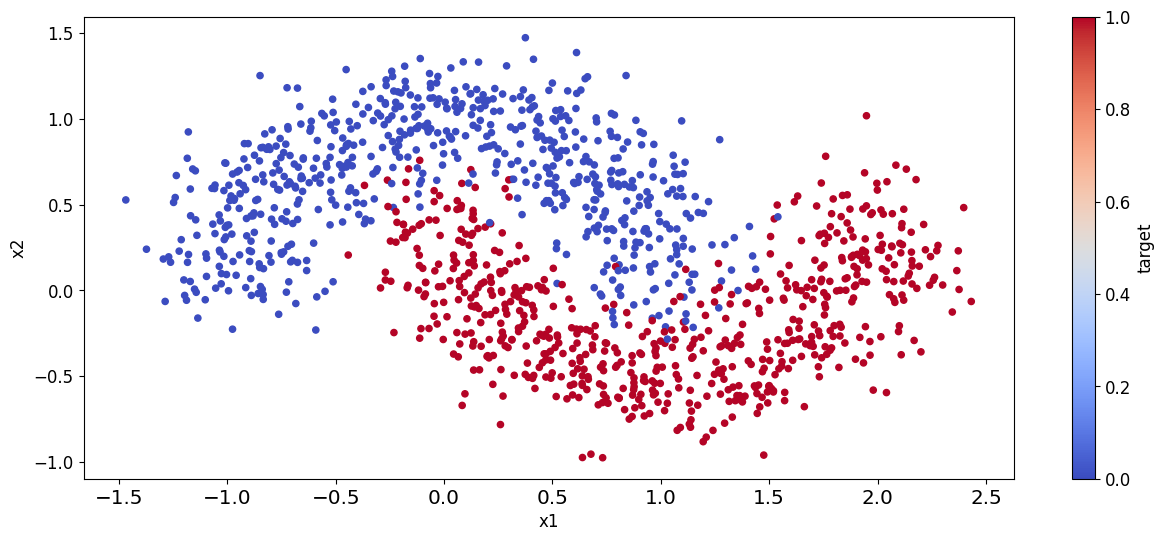

In [7]:
data_df.plot.scatter('x1', 'x2', s =20, c = 'target', cmap  = CMAP);

In [8]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE,
                                                   random_state=RANDOM_STATE)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1024, 2), (256, 2), (1024,), (256,))

## Single neuron
<img src="../../images/dnn_nb_s03_fig2.png" width='400' align = 'left'>
<img src="../../images/dnn_nb_s03_fig3.png" width='500' align = 'right'>

### For single perceptron:
   
$$
\begin{aligned}
a &=  \sigma(z)\\
a &=  \sigma(x_1 \circ w_1 + x_2 \circ w_2 + b)\\ 
a &= \sigma\ ( [ x_1, x_2 ] \circ
\begin{bmatrix} w_1 \\ w_2 \end{bmatrix}  + b )\\
\end{aligned}
$$

#### For multiple Rows of X:

$$
\begin{aligned}
a &= \sigma\ (\begin{bmatrix} x_1^{(1)} & x_2^{(1)}\\ 
x_1^{(2)} & x_2^{(2)}\\
x_1^{(...)} & x_2^{(...)}\\
x_1^{(m)} & x_2^{(m)} \end{bmatrix} \circ
\begin{bmatrix} w_1 \\ w_2 \end{bmatrix}  + b )\\
\end{aligned}
$$

In matrix form it can be represented as:

$
\begin{aligned}
a &= \sigma\ ( X_{shape = (m,2)} \circ W_{shape = (2,1)}^{[1]} + b_{shape = (1,1)})
\end{aligned}
$

**Note:** Please note that Python is going to broadcast b in all $'m'$ rows. Avoid any confusion, always maintain dimensions of $b$.

## Neural Network

Let's start with simple network. Our data has **two** features. Hence size of input layer will also be two. The output is binary, we can code it as single column as well as double column output. The hidden layer could be of **any size**. One need to execute a handful of iterations to arrive at right size of hidden layer. For purpose of today's discussions, size of hidden layer is taken as shown below.
<img src = '../../images/dnn_nb_s04_fig1.png' width = '400px' align= 'left'/>
<img src = '../../images/dnn_nb_s04_fig2.png' width = '400px' align= 'right'/>

We will be using $\tanh$ function for layer 1 (hidden layer) as it fits in majority of cases and its derivative can simply be represented as 1 -$\tanh^2(z_1)$. Since our output is binary, it makes sense to use $\text{Sigmoid}$ in the last layer.

## Forward Propagation

### For single Neuron:
$
\begin{aligned}
a &= \text{activation function} ( X \circ W_1 + b)\\
\end{aligned}
$

Hence for hidden layer, we can write as follows:

$
\begin{aligned}
z_1^{[1]} & = X . W_1^{[1]} + b_1^{[1]}\\
a_1^{[1]} & = \tanh(z_1^{[1]}) \\
\\
z_2^{[1]} & = X . W_2^{[1]} + b_2^{[1]} \\
a_2^{[1]} & = \tanh(z_2^{[1]}) \\
\\
z_3^{[1]} & = X . W_3^{[1]} + b_3^{[1]} \\
a_3^{[1]} & = \tanh(z_3^{[1]}) \\
\\
z_4^{[1]} & = X . W_4^{[1]} + b_4^{[1]} \\
a_4^{[1]} & = \tanh(z_4^{[1]}) \\
\\
\text{Or}\\
a^{[1]} &= \tanh(X \circ \begin{bmatrix} W_1^{[1]}, &W_2^{[1]}, &W_3^{[1]}, &W_4^{[1]}\end{bmatrix} + b^{[1]} )\\
\end{aligned}
$



<hr>

If we convert above to matrix version, we can say.

$
\begin{aligned}
z_{shape = (m,4)}^{[1]} & = X_{shape = (m,2)} \circ W_{shape=(2,4)}^{[1]} + b_{shape = (1,4)}^{[1]} \\
\\
a_{shape = (m,4)}^{[1]} & = \tanh(z^{[1]}) \\
\end{aligned}
$

Similarly for second layer.

$
\begin{aligned}
z_{shape = (m, 1)}^{[2]} & = a_{shape = (m,4)}^{[1]} \circ W_{shape=(4,1)}^{[2]} + b_{shape = (1,1)}^{[2]} \\
\\
a_{shape = (m, 1)}^{[2]} & = \hat{y} = \mathrm{sigmoid}(z^{[2]})\\
\end{aligned}
$

Where:

Sigmoid $\sigma$: 

$\sigma(z) = \dfrac{1}{1 + e^{-z}}$

## Activation Functions

### Sigmoid Function

In [9]:
# Define function sigmoid

def fn_sigmoid(z):
    
    return 1 /(1 + np.exp (-z ))

### Define function tanh

In [10]:
def fn_tanh(x):
    return np.tanh(x)

def fn_tanh_prime(x):
    return 1.0- np.tanh(x)**2


**Unit Test** : Its advisable to test the function.

In [11]:
fn_sigmoid(np.array([-50., 0, 50.]))

array([1.92874985e-22, 5.00000000e-01, 1.00000000e+00])

In [12]:
fn_tanh(0.5)

0.46211715726000974

In [13]:
np.tanh(0.5)

0.46211715726000974

In [14]:
fn_tanh_prime(0.5)

0.7864477329659274

## Loss Function

We need to minimize the error by adjusting ($Ws, bs$). We call the function that measures our error the <b>loss function</b>. A common choice with the sigmoid output is the cross-entropy loss. The loss for predictions $\hat{y}$ with respect to the true labels $y$ is given by:

$
\begin{aligned}
L(\hat{y_i}, y_i) =  -[y_i.log\hat{y_i} + (1 - y_i) . log(1-\hat{y_i})]
\end{aligned}
$

For all samples:

$
\begin{aligned}
J(\hat{y}, y) =  -\frac{1}{m}\sum_{i=1}^{m}[y_i.log\hat{y}_i + (1-y_i) . log(1-\hat{y}_i)]
\end{aligned}
$

### In case of Binary Classification:

$
\begin{aligned}
L(\hat{y_i}, y_i) =  -y_i.log\hat{y_i}
\end{aligned}
$

For all samples:

$
\begin{aligned}
J(\hat{y}, y) =  -\frac{1}{m}\sum_{i=1}^{m}y_i.log\hat{y}_i
\end{aligned}
$


We can use gradient descent to find its minimum. For purpose of this Session, let's use it in its simplest form - <b>batch gradient descent with fixed learning rate</b>.

### Loss Function

In [15]:
### Code Loss function

def calculate_loss(model, X, y):
    
    m = X.shape[0] # number of training examples

    ## Extract Weights
    W1 = model['W1']
    W2 = model['W2']
    b1 = model['b1']
    b2 = model['b2']
    ### Forward propagation
    # Layer 1
    z1 = X.dot(W1) + b1 # Aggregation fn
    a1 = fn_tanh(z1) # Activation
        
    # Layer 2
    z2 = a1.dot(W2) + b2  # Aggregation
    a2 = fn_sigmoid(z2) # Activation
        
    data_loss = -(y * np.log(a2)).sum()
    
    return 1./m * data_loss

## Predict Function

For predictions, we will simply be using the forward propagation. No need to iterate or calculate the back propagation for supervised learning.

In [16]:
def predict(model, X):
    
    m = X.shape[0] # number of training examples

    ## Extract Weights
    W1 = model['W1']
    W2 = model['W2']
    b1 = model['b1']
    b2 = model['b2']
    ### Forward propagation
    # Layer 1
    z1 = X.dot(W1) + b1 # Aggregation fn
    a1 = fn_tanh(z1) # Activation
        
    # Layer 2
    z2 = a1.dot(W2) + b2  # Aggregation
    a2 = fn_sigmoid(z2) # Activation
    
    return a2 >= 0.5

## For a single row of data x,

<img src='../../images/dnn_nb_s04_fig3.png' style='width: 800px;'/>

As an input, gradient descent needs the gradients (vector of derivatives) of the loss function with respect to our parameters: 

$\frac{\partial{L}}{\partial{W_1}}(= \partial{W^{[1]}})$, $\frac{\partial{L}}{\partial{b_1}}(= \partial{b^{[1]}})$, $\frac{\partial{L}}{\partial{W_2}}(= \partial{W^{[2]}})$, $\frac{\partial{L}}{\partial{b_2}}(= \partial{b^{[2]}})$. 

To calculate these gradients we use the <b>back-propagation algorithm</b>.

**Note:** Loss is a function of $a^{[2]}$ which is a function of $z^{[2]}$ and so on. It can be further represented as follows:<br>
$
\begin{aligned}
Loss &= f_1(a^{[2]})\\
a^{[2]} &= f_2(z^{[2]})\\
z^{[2]} &= f_3(a^{[1]})\\
a^{[1]} &= f_4(z^{[1]})\\
\text{Therefore:}\\
\frac{\partial{Loss}}{\partial{z^{[1]}}} &= \frac{\partial{Loss}}{\partial{z^{[2]}}} \circ
\frac{\partial{z^{[2]}}}{\partial{a^{[1]}}} \circ \frac{\partial{a^{[1]}}}{\partial{z^{[1]}}} 
\end{aligned}
$
</div>

## Back-propagation for all Rows
For all rows, equations will remain same and the values will be divided by <b><i>'m'</i></b>; number of samples.

$
\begin{aligned}
\partial{z^{[2]}}  & = a^{[2]} - y  \\
\partial{W^{[2]}}  & = \frac{1}{m} a^{[1]T}\circ \partial{z^{[2]}} \\
\partial{b^{[2]}}  & = \frac{1}{m} \mathrm{np.sum}(\partial{z^{[2]}}, axis = 0, keepdims = True) \\
\\
\partial{z^{[1]}}  & = \partial{z^{[2]}}\circ  W^{[2]T} * ( 1-a^{[1]}**2)\\
\partial{W^{[1]}}  & = \frac{1}{m} X^{T}\circ \partial{z^{[1]}} \\
\partial{b^{[1]}}  & = \frac{1}{m} \mathrm{np.sum}(\partial{z^{[1]}}, axis = 0, keepdims = True) \\
\\
\end{aligned}
$

## Notes:

We have transposed a few matrices in above calculations such as $a^{[1]}$, $W^{[2]}$ and X. A review of shapes of matrices will reveal that this adjustment is needed to have consistent sizes. e.g.

- Shape of $a^{[1]}$ and $\partial{z}^{[2]}$ are ( m, 4) and ( m, 1 ) respectively. Expected shape of $\partial{W^{[2]}}$ is ( 4, 1 ) which is same as that of $W^{[2]}$.
- In equation $\partial{z^{[1]}}  = \partial{z^{[2]}}\circ  W^{[2]T} * ( 1-a^{[1]}**2)$ shape of $z^{[2]}$,  $W^{[2]}$ and $a^{[1]}$ are (m,1), (4,1) and (m,4). For element wise multiplication, expected shape of dot product of is $z^{[2]}$ and $W^{[2]}$ is ( m, 4 ).
- Lastly, shape of $\partial{W^{[1]}}$ is (2,4) and that of X and $\partial{z^{[1]}}$ are ( m, 2 ) and ( m, 4 ).

## Build Model

In [17]:
def build_model(nn_hdim, X, y, alpha = ALPHA, epochs=EPOCHS):
    
    W1 = np.random.rand(X.shape[1], nn_hdim) / np.sqrt(nn_hdim)
    W2 = np.random.rand(nn_hdim, nn_output_dim) / np.sqrt(nn_output_dim)

    b1 = np.zeros((1, nn_hdim))
    b2 = np.zeros((1, nn_output_dim))
    
    m  = X.shape[0] # number of training example
    
    loss, e_list = [], []
    
    for epoch in range(epochs):
        
        ### Forward propagation
        # Layer 1
        z1 = X.dot(W1) + b1 # Aggregation fn 1024, 4)
        a1 = fn_tanh(z1) # Activation (1024, 4)
        
        # Layer 2
        z2 = a1.dot(W2) + b2  # Aggregation (1024,1)
        a2 = fn_sigmoid(z2) # Activation (1024,1)
        
        ### Back propagation
        # Layer 2
        assert (a2.shape == y.shape), f'Shape a2: {a2.shape} and y : {y.shape}'
        dz2 = a2 - y
        dW2 = (a1.T).dot(dz2)
        assert (W2.shape == dW2.shape), f'Shape W2: {W2.shape} and dW2 : {dW2.shape}'
        db2 = np.sum(dz2, axis = 0, keepdims=True)
        assert (b2.shape == db2.shape), f'Shape b2: {b2.shape} and db2 : {db2.shape}'

        # Layer 1
        dz1 = dz2.dot(W2.T) * fn_tanh_prime(z1) # element wise multiplication
        dW1 = (X.T).dot(dz1)
        assert (W1.shape == dW1.shape), 'Shape of W1 and dW1 are different'
        db1 = np.sum(dz1, axis = 0, keepdims=True)
        assert (b1.shape == db1.shape), f'Shape b1: {b1.shape} and db1 : {db1.shape}'
        
        # update weights by small amount
        W1 = W1 - alpha * dW1 / m
        W2 = W2 - alpha * dW2 / m
        b1 = b1 - alpha * db1 / m
        b2 = b2 - alpha * db2 / m
        
        model = {'W1': W1, 'W2': W2, 'b1': b1,'b2': b2}
                
        # Calculate loss
        curr_loss = calculate_loss(model, X, y)

        loss.append(curr_loss)
        e_list.append(epoch)
        
    hist['loss'] = loss
    hist['epoch'] = e_list
    
    return model
       

In [18]:
hist = {}

In [19]:
y_train = y_train.reshape(-1,1)
print (y_train.shape)
num_hidden = 4
nn_output_dim = 1
# Unit testing
#model = build_model(num_hidden, X_train, y_train, epochs=1)
model = build_model(num_hidden, X_train, y_train)

(1024, 1)


In [20]:
model

{'W1': array([[-3.34184641,  2.40467369,  0.459477  ,  3.26532775],
        [-1.93217531, -1.21475158, -0.87627414, -1.24969472]]),
 'W2': array([[4.82627051],
        [4.46166898],
        [2.02834298],
        [4.40758192]]),
 'b1': array([[ 1.98289256, -3.03178776,  0.02497927,  1.56026671]]),
 'b2': array([[-0.04526036]])}

In [21]:
pd.DataFrame(hist).head()

,loss,epoch
0,0.277023,0
1,0.277878,1
2,0.278659,2
3,0.279367,3
4,0.280004,4


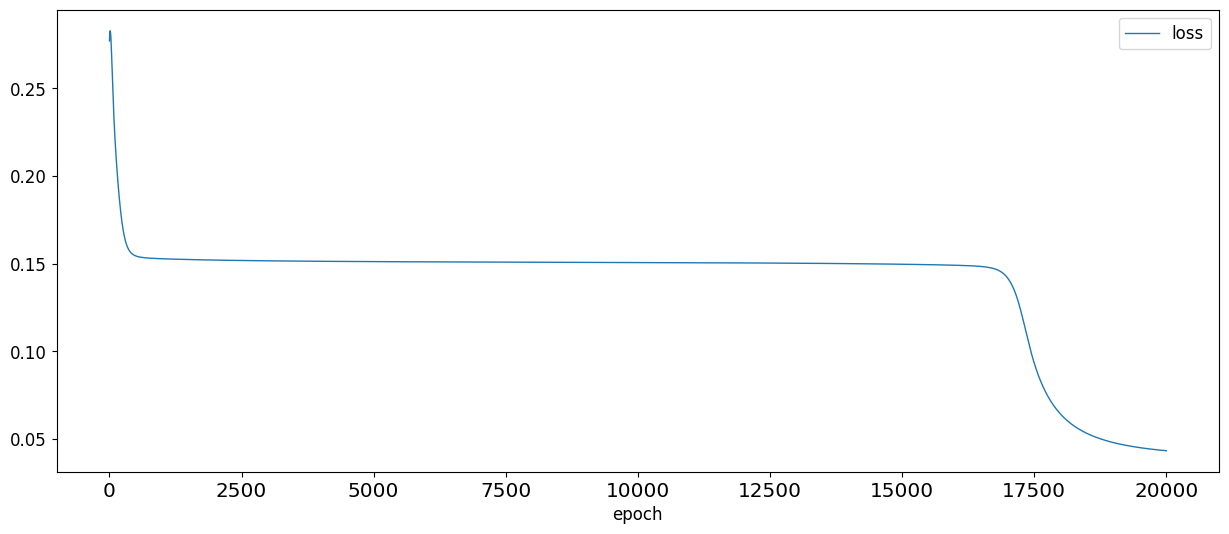

In [22]:
pd.DataFrame(hist).plot(x = 'epoch', y = 'loss');

## Predictions

### Train Set

In [23]:
y_pred = predict (model, X_train)
    
accuracy_score(y_train, y_pred)

0.96875

### Test Set

In [24]:
y_pred = predict (model, X_test)
    
accuracy_score(y_test, y_pred)

0.9609375

In [25]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[112,   6],
       [  4, 134]], dtype=int64)

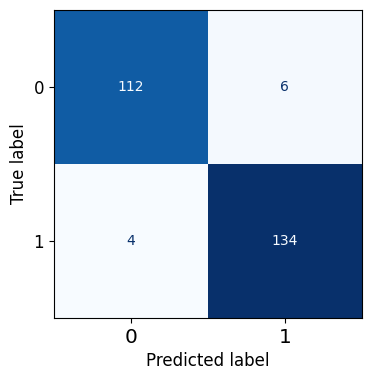

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])

fig, ax = plt.subplots(figsize = (4,4))

disp.plot(ax = ax, cmap = 'Blues', colorbar=False)

plt.show();

In [27]:
def fn_plot_decision_boundary(pred_func, X, y):
    
    fig, ax = plt.subplots(figsize= (15, 12))
    
    dm = 0.01
    
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))
    
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)
    ax.scatter(X[:, 0], X[:, 1], c=y,
                                  s=30, edgecolor='k', cmap=plt.cm.bwr)
    ax.set_title('Decision Boundary')

    ax.set_xlabel('A')
    ax.set_ylabel('B')
    plt.show()

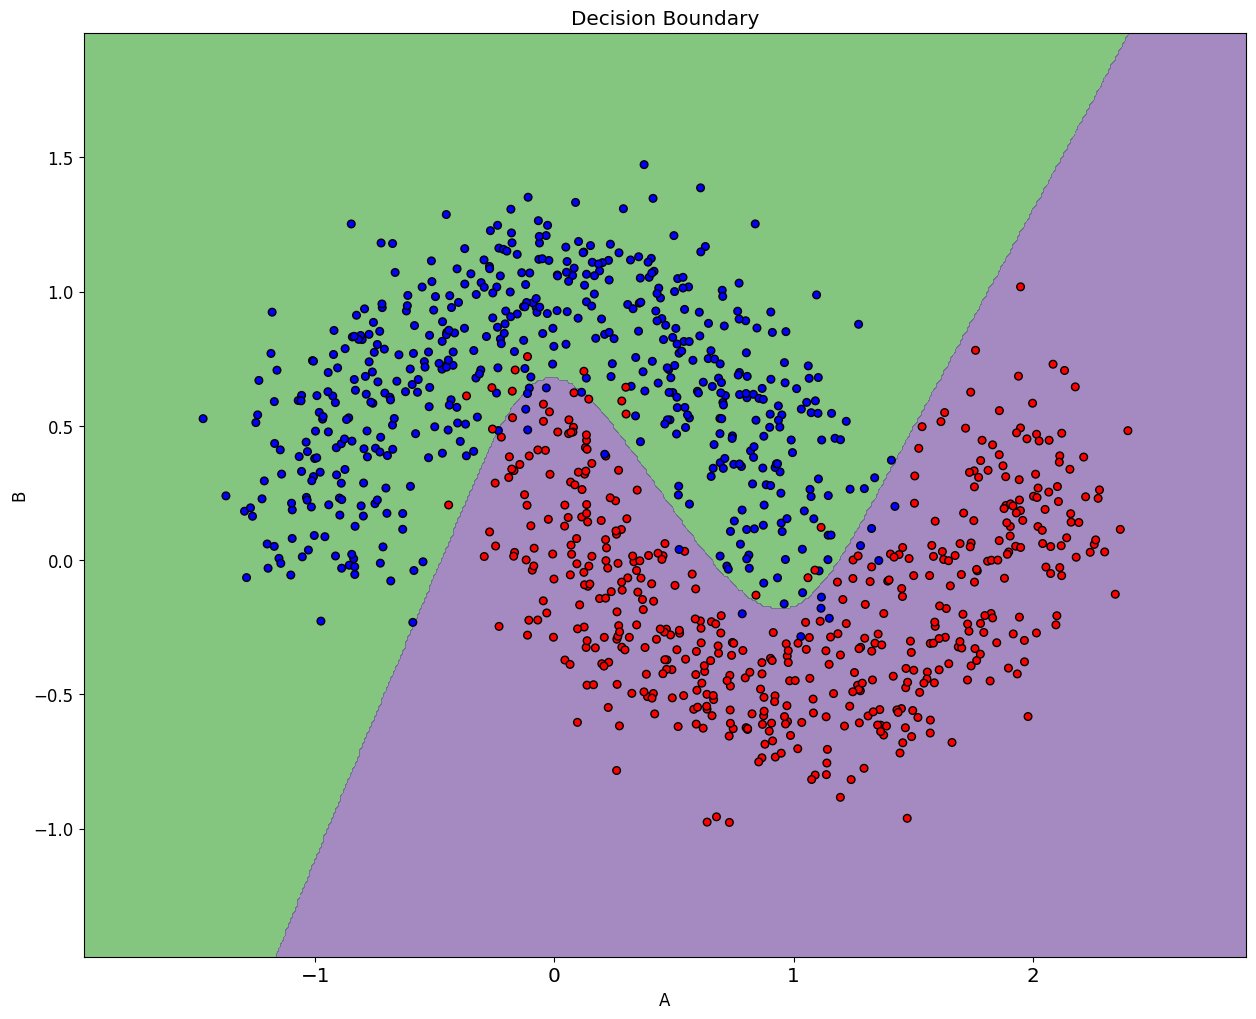

In [28]:
fn_plot_decision_boundary(lambda x: predict(model, x), X_train, y_train)